# Import

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Seed

In [0]:
np.random.seed(0)

# Plot

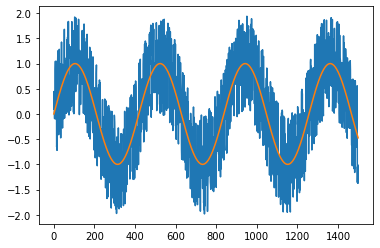

In [43]:
t = np.arange(0,1500)
x = np.sin(0.015*t) + np.random.uniform(low=-1, high=1, size=(1500,))
x_actual = np.sin(0.015*t)
plt.plot(x)
plt.plot(x_actual)

In [44]:
print(x)

[ 0.09762701  0.44537817  0.23552225 ... -1.2228959  -1.376032
 -1.01853864]


# Import

In [0]:
from sklearn.preprocessing import MinMaxScaler

Normalize

In [46]:
normalizer = MinMaxScaler(feature_range=(0, 1))
x = (np.reshape(x, (-1, 1)))
x = normalizer.fit_transform(x)
print(x)

[[0.53046776]
 [0.61911792]
 [0.56562058]
 ...
 [0.19383459]
 [0.1547965 ]
 [0.24593019]]


# Create Dataset 

In [47]:
train = x[0:1000]
test = x[1000:]
print(train.shape)

(1000, 1)


In [48]:
def createDataset(data, step):
    X, Y =[], []
    for i in range(len(data)-step): 
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)
 
step = 10
trainX,trainY = createDataset(train,step)
testX,testY = createDataset(test,step)
print(trainX[0])

[[0.53046776]
 [0.61911792]
 [0.56562058]
 [0.5399316 ]
 [0.48194208]
 [0.59906553]
 [0.49667143]
 [0.73204294]
 [0.77249547]
 [0.48046345]]


In [49]:
print(trainY[0])

[0.69241117]


# Import

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Model Creation

In [51]:
model = Sequential()
model.add(SimpleRNN(units=1, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
history = model.fit(trainX,trainY, validation_data= (testX,testY), epochs=600, batch_size=16, verbose=2)

Epoch 1/600
62/62 - 0s - loss: 0.0769 - val_loss: 0.0542
Epoch 2/600
62/62 - 0s - loss: 0.0545 - val_loss: 0.0465
Epoch 3/600
62/62 - 0s - loss: 0.0480 - val_loss: 0.0448
Epoch 4/600
62/62 - 0s - loss: 0.0452 - val_loss: 0.0428
Epoch 5/600
62/62 - 0s - loss: 0.0418 - val_loss: 0.0400
Epoch 6/600
62/62 - 0s - loss: 0.0385 - val_loss: 0.0376
Epoch 7/600
62/62 - 0s - loss: 0.0358 - val_loss: 0.0357
Epoch 8/600
62/62 - 0s - loss: 0.0338 - val_loss: 0.0345
Epoch 9/600
62/62 - 0s - loss: 0.0328 - val_loss: 0.0338
Epoch 10/600
62/62 - 0s - loss: 0.0322 - val_loss: 0.0338
Epoch 11/600
62/62 - 0s - loss: 0.0318 - val_loss: 0.0334
Epoch 12/600
62/62 - 0s - loss: 0.0314 - val_loss: 0.0332
Epoch 13/600
62/62 - 0s - loss: 0.0312 - val_loss: 0.0332
Epoch 14/600
62/62 - 0s - loss: 0.0309 - val_loss: 0.0326
Epoch 15/600
62/62 - 0s - loss: 0.0308 - val_loss: 0.0325
Epoch 16/600
62/62 - 0s - loss: 0.0305 - val_loss: 0.0323
Epoch 17/600
62/62 - 0s - loss: 0.0304 - val_loss: 0.0323
Epoch 18/600
62/62 - 0s

# Plot

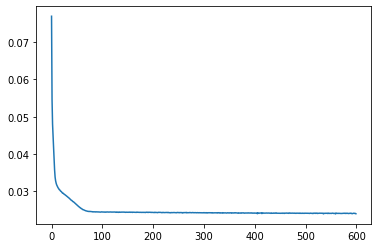

In [52]:
import matplotlib.pyplot as plt
 
loss = history.history['loss']
 
plt.plot(loss)

# Prediction

In [0]:
trainPredict = normalizer.inverse_transform(model.predict(trainX))
testPredict= normalizer.inverse_transform(model.predict(testX))
predicted= np.concatenate((trainPredict,testPredict))
x = normalizer.inverse_transform(x)

# Final Plot

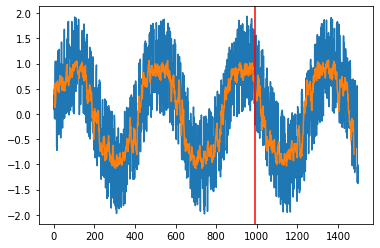

In [54]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")